# Coursera Capstone

## Battle of the Neighborhoods

## Chicago Zipcodes for Co-working and Co-living Properties

### Introduction

##### Background

A recent trend in real estate has been the emergence of co-working spaces for entrepreneurs or individuals working from home or on 1099 contracts.  These spaces provide a break from the isolation of home-offices, and fertile ground for sharing ideas and developing collaborative professional or even social relationships.  Lockdowns due to COVID 19 has resulted in announcements of more companies moving to full time remote workforces.  While many city-dwelling families are choosing to move to the suburbs and set up home offices there, this option may not look as attractive to single remote working individuals who value the social benefits that an office setting provides.  A solution for these individuals may be to set up residence in a co-working and co-living space.  This concept gained strength in San Francisco and is expanding elsewhere, as demonstrated by the emergence of companies such as [Roam Coliving](https://www.roam.co/). 

Chicago is a city with a population of 2.7 million people and is located on the shores of Lake Michigan in the MidWest.  The city hosts the nation’s [third largest airport](https://www.world-airport-codes.com/us-top-40-airports.html) with a central location relative to other U.S. cities.  This makes it easy to travel for work or personal reasons if needed.  Business and professional services as well as technology are two of the city’s [six largest industries](http://www.worldbusinesschicago.com/key-industries/), and both rank well nationally.  The city is well positioned for co-working spaces, as demonstrated by the [forecast for these spaces to triple by 2023](https://www.chicagobusiness.com/commercial-real-estate/chicago-co-working-space-nearly-triple-2023-forecast) before the on-set of COVID-19.     

##### Problem

For a real estate investor looking to capitalize on the accelerated shift to remote work, investing in a co-working and co-living property could be lucrative.  As with all other real estate, the golden rule and primary driver of value will be location.  Purchasing a property in the wrong neighborhood would result in high vacancy rates and disappointing cash flow.  The target market for these properties would be remote working single young professionals, 1099 workers, or entrepreneurs looking to gain the social benefits that an office setting offers.  For these individuals, a location that offers attractive amenities and ease of access would be important.  Considering this, I will explore Chicago neighborhoods and evaluate their potential as locations for co-working and co-living rental properties.   

In order to evaluate and cluster neighborhoods, I will look to understand the convenience factor using the following considerations: 

- Grocery stores:  prospective residents of co-working and co-living spaces will need convenient access to shop for food.  As such, access to grocery stores will be an important factor in evaluating neighborhoods. 

- Other venues: prospective residents will look to enjoy amenities that their neighborhood has to offer.  They may want to connect over happy hour or meet friends and family for food or drinks.  If they have a pet or enjoy outdoor recreation, access to parks would also be attractive.  Considering this, local parks, cafes, bars, and restaurants is another important factor.   

- Walkability:  many city dwellers do not have a car, and Chicago’s robust public transportation network makes it viable to live without one.  For this reason, walkability is an important factor in choosing a neighborhood for co-working and co-living space.  To accommodate this, proximity to grocery stores and other venues mentioned above needs to consider walkability. 

- Transportation stations and hubs:  while prospective renters may enjoy exploring the local neighborhood on foot, they likely also want to access other parts of the city.  As a result, the final consideration for prioritizing neighborhoods will be proximity to transportation stations and hubs. 

##### Interest

Real estate investors looking to acquire properties in Chicago for the purpose of renting it as a co-working and co-living space would be very interested in seeing recommended neighborhoods based on this study.  Individuals looking to rent a room in a co-working and co-living property might also be interested.

### Data

##### Data Sources

[OpenDataSoft (ODS)](https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/?q=chicago) provides latitude and longitude by zip code.  I combined this geographic data with venue data from Foursquare to complete my analysis.  After my initial analysis of venue data, I also identified the need for an improved data source of public transit stations since results in Foursquare were limited.  The City of Chicago hosts a data portal, which includes files with L-stop (city rail) and bus stop shelter data.   

##### Data Features

*OpenDataSoft (ODS) US Zip Code Latitude and Longitude Dataset*

This dataset includes the following features: 

- Zip: a list of zip codes that exists across the United States 
- City: city name that corresponds to the adjacent zip code, can be used as a filter 
- State: state name within which the zip code is located, can also be used as a filter 
- Timezone: shows the adjustment in hours from Coordinated Universal Time 
- Daylight time savings flag: indicates whether daylight time savings is relevant 
- Latitude: shows the central latitude of the zip code 
- Longitude: shows the central longitude of the zip code 

Using the ODS US Zip Code Latitude and Longitude Dataset, I would need to connect an API to obtain the Zip, City, Latitude and Longitude features.  The API lets you refine your search to include only the relevant states, in this case Illinois (IL).  However, there are cities in Illinois that include Chicago in their name so I would need to do some data cleaning to exclude zip codes related to those cities from my dataset. 

*Foursquare*

Foursquare features are comprehensive, though some of them redundant, and only a limited number of features would be critical for purposes of this analysis.  Features that would be prioritized purposes of this analysis include: 

- distance: shows the distance from the search parameter, which would be the latitude and longitude point of either the community area centroid or zip code 
- zip code: reflects the zip code in which the venue is located, which can be used to merge the resulting dataframe from the Foursquare querry with the zip code dataframe 
- category name: shows the category name of the venue based on labels assigned by Foursquare.  This will be an important component for evaluating amenities available in a neighborhood, and for clustering neighborhoods based on amenities or available venues. 

*City of Chicago data portal*

The City of Chicago hosts a data portal that includes data on [bus stop shelters](https://data.cityofchicago.org/Transportation/CTA-System-Information-Map-Showing-Bus-Stop-Shelte/mw4h-s8xu) and [L-stops](https://data.cityofchicago.org/Transportation/CTA-System-Information-List-of-L-Stops-Map/zbnc-zirh)

Data available for bus stops only include those with shelters, rather than all bus stops in Chicago.  Features of interest for this analysis include: 

- Stop_ID:  identifying number for the bus shelter within city database 
- CTA_Stop_Name:  name of relevant stop 
- Latitude: latitude of relevant stop 
- Longitude: longitude of relevant stop 

Data available for L-stations include features that designate the specific L-line, in addition to the ones prioritized for this analysis.  Features of interest for this analysis include: 

- Stop_ID:  identifying number for the bus shelter within city database 
- CTA_Stop_Name:  name of relevant stop 
- Location: latitude and longitude of relevant stop  

### Methodology

#### Collect Zip Codes

Import libraries

In [1]:
import pandas as pd
import json
import requests

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

Set up URL connection and create pandas dataframe from the results

In [2]:
# define URL and request connection
url = "https://public.opendatasoft.com/api/records/1.0/search/?dataset=us-zip-code-latitude-and-longitude&q=chicago&rows=92&facet=state&facet=timezone&facet=dst&refine.state=IL"
response = requests.get(url)

# validate that connection is successful
print(response.status_code)

200


In [3]:
x = response.json()

# assign records from API call to zipcodes
zipcodes = x['records']

#transform zipcodes into a dataframe
df = json_normalize(zipcodes)
df.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,datasetid,recordid,record_timestamp,fields.city,fields.zip,fields.dst,fields.geopoint,fields.longitude,fields.state,fields.latitude,fields.timezone,geometry.type,geometry.coordinates
0,us-zip-code-latitude-and-longitude,44f516fccacffbc1ed380ad5793f353b7b844c07,2018-02-09T16:33:38.603000+00:00,Chicago,60691,1,"[41.811929, -87.68732]",-87.68732,IL,41.811929,-6,Point,"[-87.68732, 41.811929]"
1,us-zip-code-latitude-and-longitude,4114e208637fd1c05b9d9d5e0da9a3da90ba35e5,2018-02-09T16:33:38.603000+00:00,Chicago,60699,1,"[41.811929, -87.68732]",-87.68732,IL,41.811929,-6,Point,"[-87.68732, 41.811929]"
2,us-zip-code-latitude-and-longitude,c333c5261141bd6d4d5726d0438af22608988e4f,2018-02-09T16:33:38.603000+00:00,Chicago,60613,1,"[41.953256, -87.6629]",-87.66290,IL,41.953256,-6,Point,"[-87.6629, 41.953256]"
3,us-zip-code-latitude-and-longitude,618b24ff8bc5e7c0fb62b092407b56af0a0f389f,2018-02-09T16:33:38.603000+00:00,Chicago,60683,1,"[41.811929, -87.68732]",-87.68732,IL,41.811929,-6,Point,"[-87.68732, 41.811929]"
4,us-zip-code-latitude-and-longitude,af6f3c9a5d378299085abe31d620b37c445b8edb,2018-02-09T16:33:38.603000+00:00,Chicago,60622,1,"[41.900332, -87.66927]",-87.66927,IL,41.900332,-6,Point,"[-87.66927, 41.900332]"


Filter dataframe to only include features and rows that will be needed

In [4]:
zip_df = df.filter(['fields.city', 'fields.zip', 'fields.longitude', 'fields.latitude'], axis = 1)
zip_df.head()

,fields.city,fields.zip,fields.longitude,fields.latitude
0,Chicago,60691,-87.68732,41.811929
1,Chicago,60699,-87.68732,41.811929
2,Chicago,60613,-87.66290,41.953256
3,Chicago,60683,-87.68732,41.811929
4,Chicago,60622,-87.66927,41.900332


In [5]:
# rename columns
zip_df.rename(columns={'fields.city':'City', 'fields.zip':'ZipCode', 'fields.longitude':'Longitude', 'fields.latitude':'Latitude'}, inplace=True)
zip_df.head()

,City,ZipCode,Longitude,Latitude
0,Chicago,60691,-87.68732,41.811929
1,Chicago,60699,-87.68732,41.811929
2,Chicago,60613,-87.66290,41.953256
3,Chicago,60683,-87.68732,41.811929
4,Chicago,60622,-87.66927,41.900332


In [6]:
# create a summary view of count by city in the dataframe
grouped_zip = zip_df.groupby('City').count()
grouped_zip

,ZipCode,Longitude,Latitude
City,,,
Chicago,85,85,85
Chicago Heights,2,2,2
Chicago Ridge,1,1,1
North Chicago,2,2,2
West Chicago,2,2,2


In [7]:
# remove rows where city names are not 'Chicago' exclusively, since these fall outside of city boundaries
chicagozip_df = zip_df[zip_df.City == 'Chicago']
chicagozip_df.head()

,City,ZipCode,Longitude,Latitude
0,Chicago,60691,-87.68732,41.811929
1,Chicago,60699,-87.68732,41.811929
2,Chicago,60613,-87.66290,41.953256
3,Chicago,60683,-87.68732,41.811929
4,Chicago,60622,-87.66927,41.900332


In [8]:
# validate that all non-'Chicago' specifice entries were dropped
grouped_zip1 = chicagozip_df.groupby('City').count()
grouped_zip1

,ZipCode,Longitude,Latitude
City,,,
Chicago,85,85,85


Now I have a dataframe that includes 85 zip codes within the City of Chicago, and no zip codes for cities that include Chicago in their name but fall outside of city boundaries.

### Collect venue data from Foursquare

Set up Foursquare credentials, hidden to protect secure information.

In [9]:
# @hidden_cell
CLIENT_ID = 'BPX5CRZT1QRTIZBRHKIEVD5BBK1F0JELBA1ZAQFEQZSLGIRQ' # your Foursquare ID
CLIENT_SECRET = '0ONF4NJ1ZP103M1LHR3OEUKKUQG0BGPKWHUZOMRAUZAZU5T0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

Set up a function named getNearbyVenues to loop through zip codes and run a Foursquare API query that will collect venue data and add results to a dataframe named venue_list.  The search radius is set to 500 meters.

In [10]:
def getNearbyVenues(zipcode, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(zipcode, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['ZipCode', 
                  'ZipCode Latitude', 
                  'ZipCode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create a dataframe named chicago_venues and run the function getNearbyVenues using the zipcodes, latitude, and longitude data from the chicagozip_df dataframe created earlier.

In [11]:
# type your answer here
chicago_venues = getNearbyVenues(zipcode=chicagozip_df['ZipCode'],
                                  latitudes=chicagozip_df['Latitude'],
                                  longitudes=chicagozip_df['Longitude']
                                  )

View the shape and first 5 rows of the resulting dataframe.

In [12]:
print(chicago_venues.shape)
chicago_venues.head()

(1904, 7)


,ZipCode,ZipCode Latitude,ZipCode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,60691,41.811929,-87.68732,Xavier's,41.812136,-87.684735,Lounge
1,60691,41.811929,-87.68732,El Chisme Mexican Restaurant,41.812660,-87.684950,Mexican Restaurant
2,60691,41.811929,-87.68732,Enterprise Rent-A-Car,41.811432,-87.685039,Rental Car Location
3,60691,41.811929,-87.68732,Walgreens,41.807845,-87.684808,Pharmacy
4,60691,41.811929,-87.68732,Joe's Corner of The World,41.813944,-87.688603,Food


### Explore the data

#### How does venue density compare by zipcode?

In [13]:
# group results by zipcode
chicago_venues.groupby('ZipCode').count()

,ZipCode Latitude,ZipCode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
ZipCode,,,,,,
60601,100,100,100,100,100,100
60602,100,100,100,100,100,100
60603,100,100,100,100,100,100
60604,100,100,100,100,100,100
60605,23,23,23,23,23,23
...,...,...,...,...,...,...
60693,6,6,6,6,6,6
60694,11,11,11,11,11,11
60697,11,11,11,11,11,11


To understand the data a bit better, I will use one-hot encoding to gain visibility into venue count by venue category.  I will also use the resulting one-hot encoded matrix to cluster zipcodes during a later stage of this analysis.

In [14]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['ZipCode'] = chicago_venues['ZipCode'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

#print the dimensions and view first 5 rows of the resulting matrix
print(chicago_onehot.shape)
chicago_onehot.head()

(1904, 259)


,ZipCode,ATM,Adult Boutique,Airport,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,...,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,60691,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60691,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60691,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60691,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60691,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Which zipcodes offer walkable grocery shopping?

In [15]:
# filter the one-hot matrix to only show columns for zipcodes, and venue categories 'Grocery Store' and 'Supermarket'
chicago_grocery = chicago_onehot.filter(['ZipCode', 'Grocery Store', 'Supermarket'], axis=1)

# add a column 'Grocery Shopping' that adds together the results from the 'Grocery Store' and 'Supermarket' venue categories
chicago_grocery['Grocery Shopping'] = chicago_grocery['Grocery Store'] + chicago_grocery['Supermarket']

# filter dataframe to exclude zipcodes that have no grocery shopping within a 500 meter radius of the zipcode coordinates
available_grocery_shopping = chicago_grocery[chicago_grocery['Grocery Shopping'] != 0]

#view shape and first 5 rows of the resulting dataframe
print(available_grocery_shopping.shape)
available_grocery_shopping.head()

(24, 4)


,ZipCode,Grocery Store,Supermarket,Grocery Shopping
117,60622,1,0,1
241,60601,1,0,1
333,60646,1,0,1
571,60614,1,0,1
783,60660,1,0,1


To get a bit more insight into the results, I will transform the dataframe to show only the 'Grocery Shopping' column and view results as a bar chart.

In [16]:
# remove 'Grocery Store' and 'Supermarket' columns
shopping_short = available_grocery_shopping.drop(['Grocery Store', 'Supermarket'], axis=1)

# view dataframe
shopping_short

,ZipCode,Grocery Shopping
117,60622,1
241,60601,1
333,60646,1
571,60614,1
783,60660,1
905,60618,1
954,60608,1
955,60608,1
975,60653,1
1095,60606,1


<function matplotlib.pyplot.show(*args, **kw)>

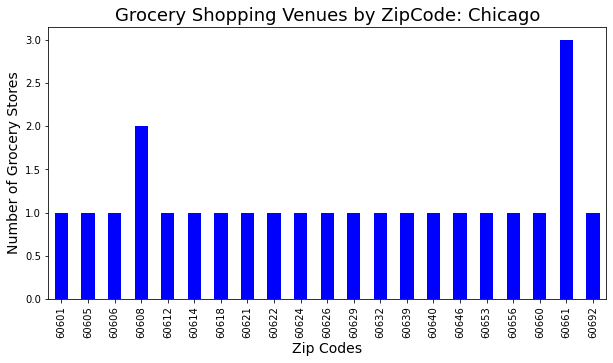

In [17]:
import matplotlib.pyplot as plt # for creating the bar chart

# define parameters for the bar chart
shopping_short.groupby('ZipCode')['Grocery Shopping'].count().plot.bar(figsize = (10, 5), color = 'blue')
plt.title('Grocery Shopping Venues by ZipCode: Chicago', fontsize = 18)
plt.xlabel('Zip Codes', fontsize = 14)
plt.ylabel('Number of Grocery Stores', fontsize = 14)

# display the bar chart
plt.show

#### Which zipcodes provide access to public transit stations?

In [18]:
# filter the one-hot matrix to only show columns for zipcodes, and venue categories 'Bus Stop' and 'Train Station'
foursquare_transit = chicago_onehot[['ZipCode', 'Bus Stop', 'Train Station']]

# add a column 'Public Transit Stations' that adds together the results from the 'Bus Stop' and 'Train Station' venue categories
foursquare_transit['Public Transit Stations'] = foursquare_transit['Bus Stop'] + foursquare_transit['Train Station']

# filter dataframe to exclude zipcodes that have no grocery shopping within a 500 meter radius of the zipcode coordinates
available_public_transit = foursquare_transit[foursquare_transit['Public Transit Stations'] != 0]

#view shape and first 5 rows of the resulting dataframe
print(available_public_transit.shape)
available_public_transit.head()

(16, 4)


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ZipCode,Bus Stop,Train Station,Public Transit Stations
300,60601,0,1,1
486,60602,0,1,1
711,60607,0,1,1
797,60651,1,0,1
850,60636,0,1,1


Based on the results above, only 15 zipcodes returned results with public transit stations from Foursquare.  According to the Chicago Transit Authority, there are [10,768 bus stops](https://www.transitchicago.com/facts/#:~:text=CTA%20has%201%2C864%20buses%20that,and%20224.1%20miles%20of%20track) alone, so this data would be insufficient to evaluate access to public transportation.  Fortunately, I was able to locate data on bus stop shelters and L-stops (city train system) from the City of Chicago.  I loaded each file and will load them individually to create two dataframes and merge them together.

Collect bus station shelter data

In [66]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8e898ec425504f87a573da27127f4aaf = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='J0XbJZ3MyvjDuk_PW7Ju0THOqUG-3QNlwadcdkTFn3yT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_8e898ec425504f87a573da27127f4aaf.get_object(Bucket='courseracapstone-donotdelete-pr-hvq0a8ft6vlvcy',Key='Bus_Stops.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_busstop = pd.read_csv(body)
df_busstop.head()


,Stop_ID,CTA_Stop_Name,Direction,Routes,Ward,LONGITUDE,LATITUDE,Location
0,68,Jackson & Franklin,EB,"1,7,28,126,130,151,156",42,-87.635401,41.878051,"(41.878051, -87.635401)"
1,69,Jackson & Financial Place,EB,"1,7,28,126,130,132,151",42,-87.632868,41.878081,"(41.878081, -87.632868)"
2,73,Michigan & Van Buren/Congress,SB,"1,3,4,7,J14,26,28,126,132,143,147",42,-87.624396,41.876271,"(41.876271, -87.624396)"
3,75,Michigan & Van Buren,NB,"1,7,28,126",42,-87.624160,41.876690,"(41.87669, -87.62416)"
4,76,Michigan & Jackson,NB,"3,4,6,J14,26,143",42,-87.624193,41.878135,"(41.878135, -87.624193)"


In [67]:
#drop columns that will not be needed
df_busstop.drop(['Direction', 'Routes', 'Ward', 'Location'], axis=1,inplace=True)
df_busstop.head()

,Stop_ID,CTA_Stop_Name,LONGITUDE,LATITUDE
0,68,Jackson & Franklin,-87.635401,41.878051
1,69,Jackson & Financial Place,-87.632868,41.878081
2,73,Michigan & Van Buren/Congress,-87.624396,41.876271
3,75,Michigan & Van Buren,-87.624160,41.876690
4,76,Michigan & Jackson,-87.624193,41.878135


In [69]:
#add a column to designate row data as bus stops
df_busstop['Type'] = 'Bus_Stop'
df_busstop.head()

,Stop_ID,CTA_Stop_Name,LONGITUDE,LATITUDE,Type
0,68,Jackson & Franklin,-87.635401,41.878051,Bus_Stop
1,69,Jackson & Financial Place,-87.632868,41.878081,Bus_Stop
2,73,Michigan & Van Buren/Congress,-87.624396,41.876271,Bus_Stop
3,75,Michigan & Van Buren,-87.624160,41.876690,Bus_Stop
4,76,Michigan & Jackson,-87.624193,41.878135,Bus_Stop


Collect L-stop data

In [71]:

body = client_8e898ec425504f87a573da27127f4aaf.get_object(Bucket='courseracapstone-donotdelete-pr-hvq0a8ft6vlvcy',Key='L_Stops.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_lstop = pd.read_csv(body)
df_lstop.head()


,STOP_ID,STOP_NAME,STATION_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30162,18th (54th/Cermak-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,18th (Loop-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,35th/Archer (Loop-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,35th/Archer (Midway-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"


In [74]:
#split Location data into LATITUDE and LONGITUDE columns
df_lstop[['LATITUDE', 'LONGITUDE']] = df_lstop.Location.str.split(",", expand=True)
df_lstop.head()

,STOP_ID,STOP_NAME,STATION_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,LATITUDE,LONGITUDE
0,30162,18th (54th/Cermak-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)",(41.857908,-87.669147)
1,30161,18th (Loop-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)",(41.857908,-87.669147)
2,30022,35th/Archer (Loop-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)",(41.829353,-87.680622)
3,30023,35th/Archer (Midway-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)",(41.829353,-87.680622)
4,30214,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)",(41.831677,-87.625826)


In [75]:
#remove non-numeric characters and change datatype to float
df_lstop['LONGITUDE'] = df_lstop['LONGITUDE'].replace(r"\)", "", regex=True).astype(float)
df_lstop['LATITUDE'] = df_lstop['LATITUDE'].replace(r"\(", "", regex=True).astype(float)
df_lstop.head()

,STOP_ID,STOP_NAME,STATION_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,LATITUDE,LONGITUDE
0,30162,18th (54th/Cermak-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)",41.857908,-87.669147
1,30161,18th (Loop-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)",41.857908,-87.669147
2,30022,35th/Archer (Loop-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)",41.829353,-87.680622
3,30023,35th/Archer (Midway-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)",41.829353,-87.680622
4,30214,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)",41.831677,-87.625826


In [77]:
#drop columns that won't be needed
df_lstop.drop(['STATION_NAME', 'MAP_ID', 'ADA', 'RED', 'BLUE', 'G', 'BRN', 'P', 'Pexp', 'Y', 'Pnk', 'O', 'Location'], axis=1,inplace=True)
df_lstop.head()

,STOP_ID,STOP_NAME,LATITUDE,LONGITUDE
0,30162,18th (54th/Cermak-bound),41.857908,-87.669147
1,30161,18th (Loop-bound),41.857908,-87.669147
2,30022,35th/Archer (Loop-bound),41.829353,-87.680622
3,30023,35th/Archer (Midway-bound),41.829353,-87.680622
4,30214,35-Bronzeville-IIT (63rd-bound),41.831677,-87.625826


In [78]:
#reorder columns to be consistent with the order in the bus stop dataframe
df_lstop = df_lstop[['STOP_ID', 'STOP_NAME', 'LONGITUDE', 'LATITUDE']]
df_lstop.head()

,STOP_ID,STOP_NAME,LONGITUDE,LATITUDE
0,30162,18th (54th/Cermak-bound),-87.669147,41.857908
1,30161,18th (Loop-bound),-87.669147,41.857908
2,30022,35th/Archer (Loop-bound),-87.680622,41.829353
3,30023,35th/Archer (Midway-bound),-87.680622,41.829353
4,30214,35-Bronzeville-IIT (63rd-bound),-87.625826,41.831677


In [79]:
#rename columns to be consistent with column names
df_lstop.rename(columns = {'STOP_ID':'Stop_ID', 'STOP_NAME': 'CTA_Stop_Name'}, inplace=True)
df_lstop.head()

,Stop_ID,CTA_Stop_Name,LONGITUDE,LATITUDE
0,30162,18th (54th/Cermak-bound),-87.669147,41.857908
1,30161,18th (Loop-bound),-87.669147,41.857908
2,30022,35th/Archer (Loop-bound),-87.680622,41.829353
3,30023,35th/Archer (Midway-bound),-87.680622,41.829353
4,30214,35-Bronzeville-IIT (63rd-bound),-87.625826,41.831677


In [80]:
#add a column to designate row data as train stops
df_lstop.loc[:,'Type'] = 'Train_Stop'
df_lstop.head()

,Stop_ID,CTA_Stop_Name,LONGITUDE,LATITUDE,Type
0,30162,18th (54th/Cermak-bound),-87.669147,41.857908,Train_Stop
1,30161,18th (Loop-bound),-87.669147,41.857908,Train_Stop
2,30022,35th/Archer (Loop-bound),-87.680622,41.829353,Train_Stop
3,30023,35th/Archer (Midway-bound),-87.680622,41.829353,Train_Stop
4,30214,35-Bronzeville-IIT (63rd-bound),-87.625826,41.831677,Train_Stop


Merge bus stop and L-stop data into a single dataframe

In [82]:
frames = [df_busstop, df_lstop]
public_transport = pd.concat(frames)

#look at the shape of the merged dataframe and print the first 5 rows
print(public_transport.shape)
public_transport.head()

(698, 5)


,Stop_ID,CTA_Stop_Name,LONGITUDE,LATITUDE,Type
0,68,Jackson & Franklin,-87.635401,41.878051,Bus_Stop
1,69,Jackson & Financial Place,-87.632868,41.878081,Bus_Stop
2,73,Michigan & Van Buren/Congress,-87.624396,41.876271,Bus_Stop
3,75,Michigan & Van Buren,-87.624160,41.876690,Bus_Stop
4,76,Michigan & Jackson,-87.624193,41.878135,Bus_Stop


In [83]:
#validate data types
public_transport.dtypes

Stop_ID            int64
CTA_Stop_Name     object
LONGITUDE        float64
LATITUDE         float64
Type              object
dtype: object

Visualize the bus stops

In [84]:
#install folium
! pip install folium==0.5.0
import folium # plotting library

In [85]:
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

In [86]:
#look up chicago coordinates

address = "Chicago, IL"

geolocator = Nominatim(user_agent="chicago_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

41.8755616 -87.6244212


In [88]:
chi_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map centred around city center


# add Chicago city center as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    popup='Chicago',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.5
    ).add_to(chi_map)


# add public transit stations to the map as black dots
for LATITUDE, LONGITUDE, label in zip(public_transport.LATITUDE, public_transport.LONGITUDE, public_transport.Type):
    folium.CircleMarker(
        [LATITUDE, LONGITUDE],
        radius=1,
        popup=label,
        fill=True,
        color='black',
        fill_color='black',
        fill_opacity=0.5
        ).add_to(chi_map)

# display map
chi_map

#### What other amenities do zipcodes offer?

Since I identified that there are 21 zipcodes with walkable grocery shopping options, I will narrow my review of other amenities to include only those zipcodes.  In order to do so, I will merge the shopping_short dataframe, which contains zipcodes with walkable grocery shopping, with the one-hot encoded matrix.  However, as I already addressed the considerations of grocery shopping and access to public transit, I want to exclude related venue categories so that I am exclusively looking at remaining neighborhood amenities.  So I will first remove columns related to grocery and public transit venue categories, and then merge the filtered one-hot matrix with the shortlist of zipcodes with walkable grocery shopping.

In [19]:
# drop columns related to grocery shopping and public transit
filtered_onehot = chicago_onehot.drop(['Bus Stop', 'Train Station', 'Grocery Store', 'Supermarket', 'Bus Station'], axis=1)

# validate that the new matrix has been adjusted down from the original 259 columns
filtered_onehot.shape

(1904, 254)

In [20]:
# merge shopping_short with filtered_onehot
merged_onehot = shopping_short.join(filtered_onehot.set_index('ZipCode'), on='ZipCode')

# remove 'Grocery Shopping' from the merged dataframe
merged_onehot.drop(['Grocery Shopping'], axis=1, inplace = True)

# review merged matrix shape and print first 5 rows of data
print(merged_onehot.shape)
merged_onehot.head()

(858, 254)


,ZipCode,ATM,Adult Boutique,Airport,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,...,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
117,60622,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,60622,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,60622,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,60622,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,60622,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


With a refined dataframe in place, I'm now ready to explore the distribution of amenities in the 21 zipcodes.  To do so, I will normalize the data and then set up a function to sort venues in descending order.

In [21]:
# group rows by zipcode and calculate the mean of the frequency of occurrence of each category
chicago_grouped = merged_onehot.groupby('ZipCode').mean().reset_index()

# review dataframe shape and print first 5 rows of data
print(chicago_grouped.shape)
chicago_grouped.head()

(21, 254)


,ZipCode,ATM,Adult Boutique,Airport,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,...,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,60601,0.0,0.0,0.0,0.03,0.01,0.0,0.0,0.0,0.0,...,0.000000,0.00,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0
1,60605,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000000,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,60606,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,...,0.000000,0.01,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,60608,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.066667,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,60612,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000000,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [22]:
# define function to sort venues in descending order by zipcode
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
# create dataframe with top 10 most common venues by zipcode
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['ZipCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
zipcode_venues_sorted = pd.DataFrame(columns=columns)
zipcode_venues_sorted['ZipCode'] = chicago_grouped['ZipCode']

for ind in np.arange(chicago_grouped.shape[0]):
    zipcode_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

print(zipcode_venues_sorted.shape)
zipcode_venues_sorted.head()

(21, 11)


,ZipCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,60601,Hotel,Coffee Shop,Seafood Restaurant,Plaza,American Restaurant,Steakhouse,Pizza Place,Bakery,Theater,Restaurant
1,60605,Football Stadium,Park,Historic Site,Cocktail Bar,Fast Food Restaurant,Sporting Goods Shop,Bistro,Burger Joint,English Restaurant,Sushi Restaurant
2,60606,Coffee Shop,Snack Place,Sandwich Place,Mediterranean Restaurant,Donut Shop,New American Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,BBQ Joint,Burger Joint
3,60608,Pizza Place,Automotive Shop,Plaza,Dessert Shop,Sandwich Place,Mexican Restaurant,Massage Studio,Flower Shop,Pharmacy,Boat or Ferry
4,60612,Sandwich Place,Fast Food Restaurant,Gas Station,Chinese Restaurant,Park,Bar,Bank,Donut Shop,Pharmacy,Pizza Place


### Machine Learning

With top 10 most common venues in place, I'm ready to leverage machine learning to help me group zipcodes.  I will use k-means clustering to achieve this, and in order to do so I need to first determine the optimal k number of clusters using the elbow method.

Import necessary libraries

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
# import k-means from clustering stage
from sklearn.cluster import KMeans

Test for optimal k

In [28]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(chicago_grouped)
    distortions.append(kmeanModel.inertia_)

Plot results

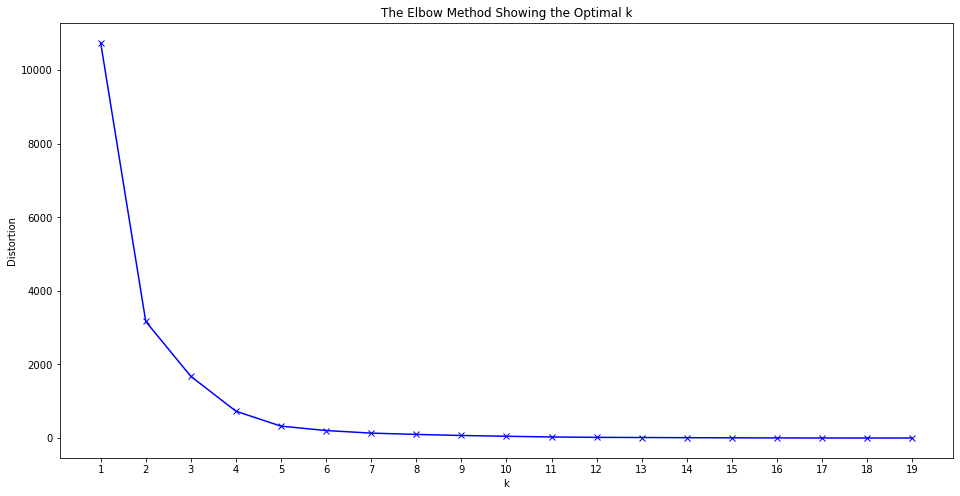

In [29]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.xticks(K)
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the Optimal k')
plt.show()

Based on these results, the optimal k for clustering zipcodes will be 4.  Now I'm ready to run k-means to cluster the zipcodes.

In [30]:
# set number of clusters
kclusters = 4

chicago_grouped_clustering = chicago_grouped.drop('ZipCode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3], dtype=int32)

Next I will merge the clusters into the chicagozip_df dataframe using the ZipCode field to join.  This will enable me to access the longitude and latitude of each zipcode in order to visualize the results on a map.  However, since chicagozip_df dataframe contains all the zipcodes that were originally obtained, I will need to remove zipcodes that don't have any walkable grocery shopping options.  Since these zipcodes won't have any clusters, I can eliminate rows with NaN values.

In [31]:
# add clustering labels
zipcode_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

chicago_merged = chicagozip_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.join(zipcode_venues_sorted.set_index('ZipCode'), on='ZipCode')

chicago_merged.shape 

(85, 15)

In [32]:
# drop rows with NaN values
chicago_merged.dropna(0, inplace=True)

In [35]:
chicago_merged.shape

(21, 15)

Before I plot the clusters, I need to validate that datatypes are appropriate.

In [33]:
chicago_merged.dtypes

City                       object
ZipCode                    object
Longitude                 float64
Latitude                  float64
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

Since folium will not be able to use cluster labels set as float values, I will need to reset these to integers.

In [34]:
chicago_merged['Cluster Labels'] = chicago_merged['Cluster Labels'].astype(int)

Now I'm ready to visualize the results using folium.

In [89]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ['red', 'blue', 'green', 'purple']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['Latitude'], chicago_merged['Longitude'], chicago_merged['ZipCode'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=500,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.3).add_to(map_clusters)
  
# add bus and train stops to the map as blue circle markers
for LATITUDE, LONGITUDE, label in zip(public_transport.LATITUDE, public_transport.LONGITUDE, public_transport.Type):
    folium.CircleMarker(
        [LATITUDE, LONGITUDE],
        radius=1,
        popup=label,
        fill=True,
        color='black',
        fill_color='black',
        fill_opacity=0.5
        ).add_to(map_clusters)
     
map_clusters

In reviewing access to public transport, all but zip code 60646 either overlap with a bus stop shelter or train stop, or have one or more located near the 500-meter radius border.  Properties purchased closer to the border might still qualify as having walkable access to grocery shopping, other venues, as well as access to public transit.  

Next I can review clusters of zipcodes as dataframes.

Cluster 0

In [48]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 0, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,ZipCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,60622,Mexican Restaurant,Bar,Mobile Phone Shop,Coffee Shop,Sushi Restaurant,Gym,Gym / Fitness Center,Plaza,Optical Shop,Shoe Store
12,60601,Hotel,Coffee Shop,Seafood Restaurant,Plaza,American Restaurant,Steakhouse,Pizza Place,Bakery,Theater,Restaurant
15,60646,Sandwich Place,Sports Bar,Salon / Barbershop,Restaurant,Gas Station,Diner,Insurance Office,Gift Shop,Golf Course,Ice Cream Shop
20,60614,Yoga Studio,Bakery,Pizza Place,Coffee Shop,Donut Shop,Restaurant,Café,Mexican Restaurant,Bookstore,Bike Rental / Bike Share
35,60660,Theater,Pizza Place,Coffee Shop,Martial Arts School,Mexican Restaurant,Motel,Basketball Court,Garden Center,Soccer Field,Intersection
43,60618,Bank,Currency Exchange,Park,Theater,Mattress Store,Kids Store,Korean Restaurant,Brewery,Shopping Mall,Shoe Store
46,60608,Pizza Place,Automotive Shop,Plaza,Dessert Shop,Sandwich Place,Mexican Restaurant,Massage Studio,Flower Shop,Pharmacy,Boat or Ferry
49,60606,Coffee Shop,Snack Place,Sandwich Place,Mediterranean Restaurant,Donut Shop,New American Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,BBQ Joint,Burger Joint
58,60605,Football Stadium,Park,Historic Site,Cocktail Bar,Fast Food Restaurant,Sporting Goods Shop,Bistro,Burger Joint,English Restaurant,Sushi Restaurant
59,60629,Pizza Place,Bakery,Liquor Store,Italian Restaurant,Camera Store,Laundromat,Spa,Falafel Restaurant,Farmers Market,Fast Food Restaurant


Cluster 1

In [49]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 1, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,ZipCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
61,60639,Mexican Restaurant,Donut Shop,Pizza Place,Park,Sandwich Place,Ice Cream Shop,Falafel Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant


Cluster 2

In [50]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 2, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,ZipCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
47,60653,Coffee Shop,Southern / Soul Food Restaurant,Gas Station,Breakfast Spot,Discount Store,Eye Doctor,Empanada Restaurant,English Restaurant,Exhibit,Yoga Studio


Cluster 3

In [51]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 3, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,ZipCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
84,60624,Shoe Store,Fast Food Restaurant,Sporting Goods Shop,Fried Chicken Joint,Sandwich Place,Caribbean Restaurant,Clothing Store,Middle Eastern Restaurant,Exhibit,Eye Doctor


Clustering the zip codes resulted in one cluster with 18 zip codes, while the remaining 3 zip codes were each assigned to their own cluster.  Based on this analysis, cluster 0 appears to be the best match of potential zip codes for purchasing a co-working and co-living property. This narrows down the initial 85 zip codes to 18 potential zip codes for further review and analysis.  I'll put this into its own dataframe and reset the index.

In [53]:
priority_zipcodes = chicago_merged[(chicago_merged['Cluster Labels'] == 0)].reset_index()
priority_zipcodes.head()

,index,City,ZipCode,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,Chicago,60622,-87.66927,41.900332,0,Mexican Restaurant,Bar,Mobile Phone Shop,Coffee Shop,Sushi Restaurant,Gym,Gym / Fitness Center,Plaza,Optical Shop,Shoe Store
1,12,Chicago,60601,-87.62325,41.886456,0,Hotel,Coffee Shop,Seafood Restaurant,Plaza,American Restaurant,Steakhouse,Pizza Place,Bakery,Theater,Restaurant
2,15,Chicago,60646,-87.76010,41.995331,0,Sandwich Place,Sports Bar,Salon / Barbershop,Restaurant,Gas Station,Diner,Insurance Office,Gift Shop,Golf Course,Ice Cream Shop
3,20,Chicago,60614,-87.65432,41.922682,0,Yoga Studio,Bakery,Pizza Place,Coffee Shop,Donut Shop,Restaurant,Café,Mexican Restaurant,Bookstore,Bike Rental / Bike Share
4,35,Chicago,60660,-87.66670,41.990631,0,Theater,Pizza Place,Coffee Shop,Martial Arts School,Mexican Restaurant,Motel,Basketball Court,Garden Center,Soccer Field,Intersection


I'll now clean this up a bit to show only the zipcodes and 10 most common venues.

In [55]:
priority_zipcodes.drop(['index', 'City', 'Longitude', 'Latitude', 'Cluster Labels'], axis = 1, inplace = True)
priority_zipcodes

,ZipCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,60622,Mexican Restaurant,Bar,Mobile Phone Shop,Coffee Shop,Sushi Restaurant,Gym,Gym / Fitness Center,Plaza,Optical Shop,Shoe Store
1,60601,Hotel,Coffee Shop,Seafood Restaurant,Plaza,American Restaurant,Steakhouse,Pizza Place,Bakery,Theater,Restaurant
2,60646,Sandwich Place,Sports Bar,Salon / Barbershop,Restaurant,Gas Station,Diner,Insurance Office,Gift Shop,Golf Course,Ice Cream Shop
3,60614,Yoga Studio,Bakery,Pizza Place,Coffee Shop,Donut Shop,Restaurant,Café,Mexican Restaurant,Bookstore,Bike Rental / Bike Share
4,60660,Theater,Pizza Place,Coffee Shop,Martial Arts School,Mexican Restaurant,Motel,Basketball Court,Garden Center,Soccer Field,Intersection
5,60618,Bank,Currency Exchange,Park,Theater,Mattress Store,Kids Store,Korean Restaurant,Brewery,Shopping Mall,Shoe Store
6,60608,Pizza Place,Automotive Shop,Plaza,Dessert Shop,Sandwich Place,Mexican Restaurant,Massage Studio,Flower Shop,Pharmacy,Boat or Ferry
7,60606,Coffee Shop,Snack Place,Sandwich Place,Mediterranean Restaurant,Donut Shop,New American Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,BBQ Joint,Burger Joint
8,60605,Football Stadium,Park,Historic Site,Cocktail Bar,Fast Food Restaurant,Sporting Goods Shop,Bistro,Burger Joint,English Restaurant,Sushi Restaurant
9,60629,Pizza Place,Bakery,Liquor Store,Italian Restaurant,Camera Store,Laundromat,Spa,Falafel Restaurant,Farmers Market,Fast Food Restaurant


Other considerations that were not included in this analysis, but that would be important include: 

- Available budget: neighborhoods closer to the city would demand higher real estate prices, and the investor would need to evaluate, and filter priority zip codes based on the available budget for property acquisition 
- Investor goals: some neighborhoods will yield higher cash flow based on low vacancy rates and reasonable property values compared to market rent, while others would present high-growth opportunities but lower cash flow.  Real estate investors would need to evaluate and refine priority zip codes based on their personal goals. 
- Safety:  neighborhoods were not evaluated for safety and doing so would be an important part of due diligence for any real estate investor.  

Further segmentation can help to refine the list of priority zip codes and narrow investor focus on neighborhoods that would suit their situation.  This segmentation can be achieved by integrating the following data points into future iterations of this analysis: 

- Average sales price by unit type (single family home, condo) and size (3 br, 4 br, 5 br) 
- Growth in sales price over time (1 yr, 5 yrs, 10 yrs) 
- Market rent per room 
- Vacancy rate 
- Median income 
- Safety as measured by crime incidents 